<a href="https://colab.research.google.com/github/shahpranshu27/Google-Colab-Testing/blob/main/Magic_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is from UCI Machine Learning Repository

(https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [22]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df = pd.read_csv("magic04.data", names=cols)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [23]:
df["class"] = (df["class"] == "g").astype(int)

In [24]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


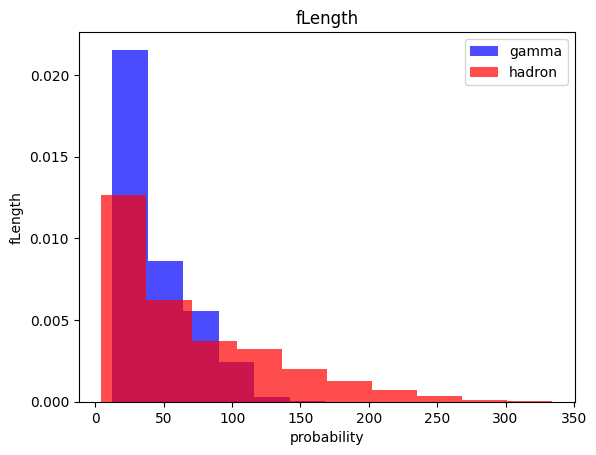

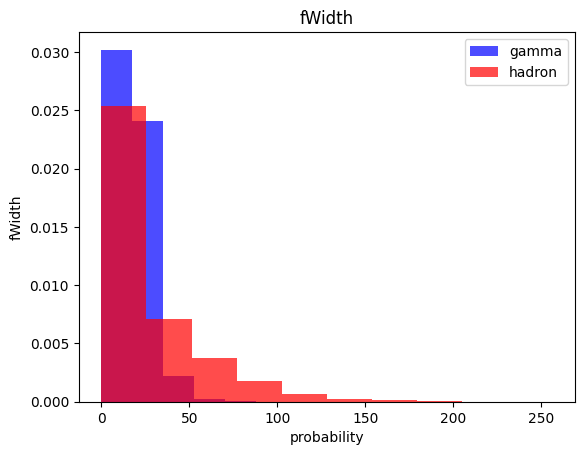

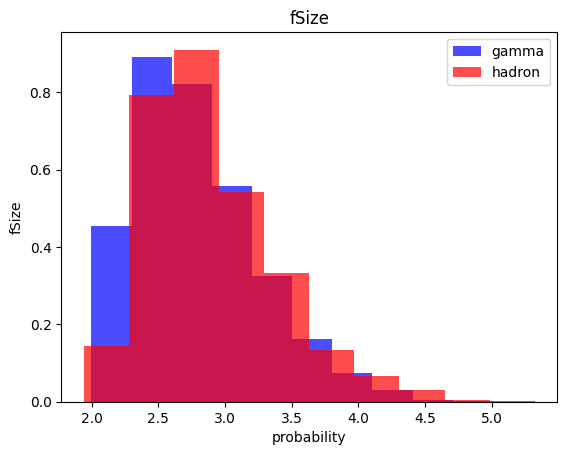

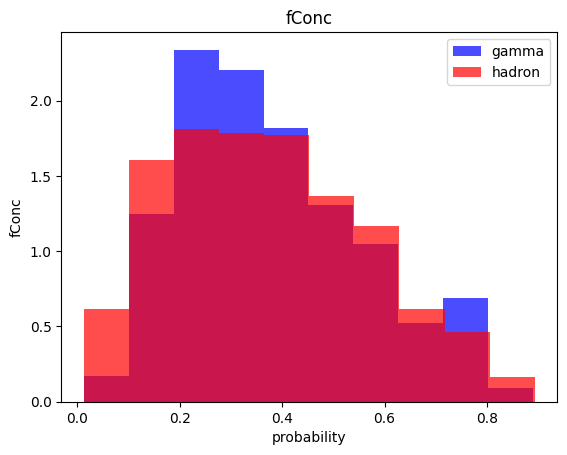

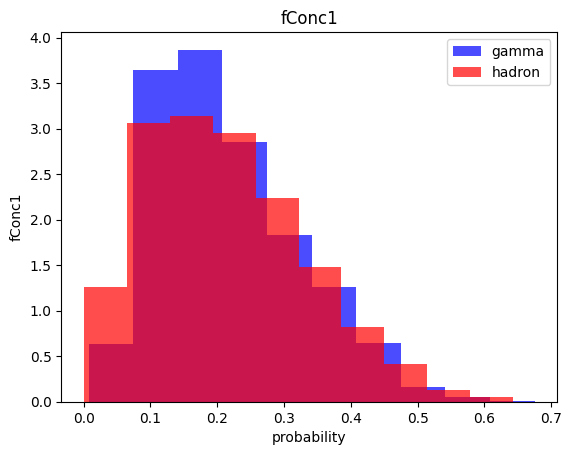

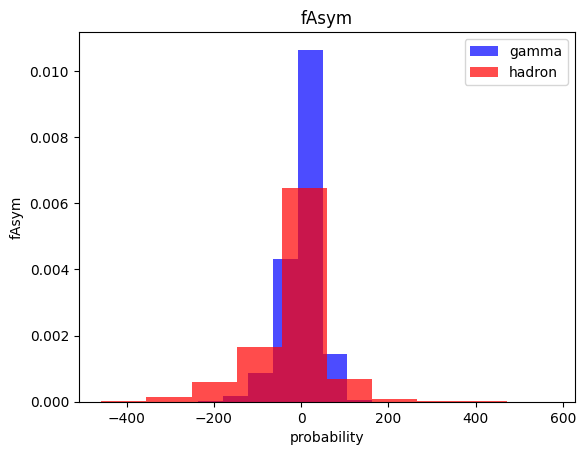

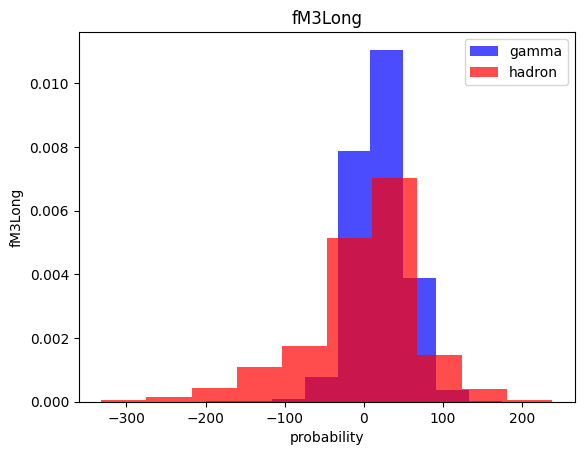

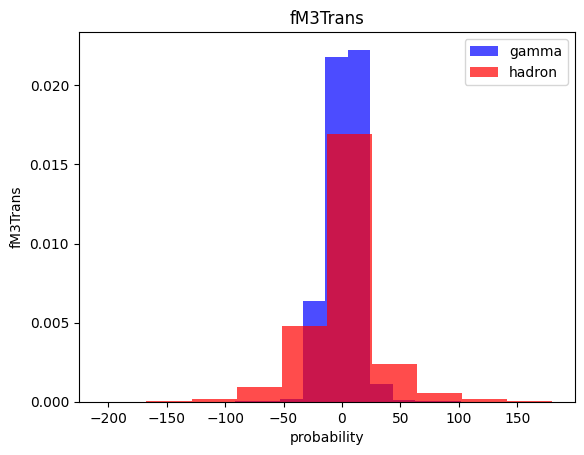

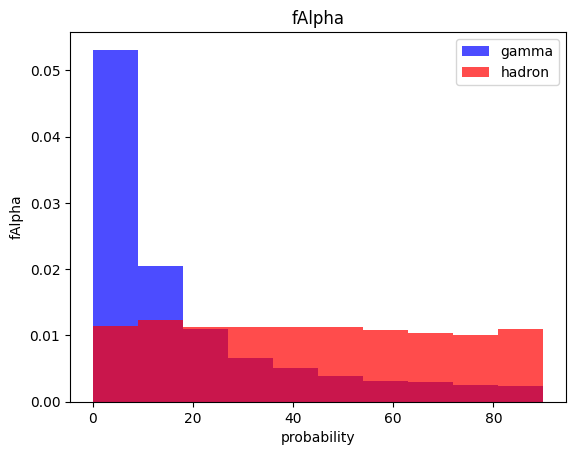

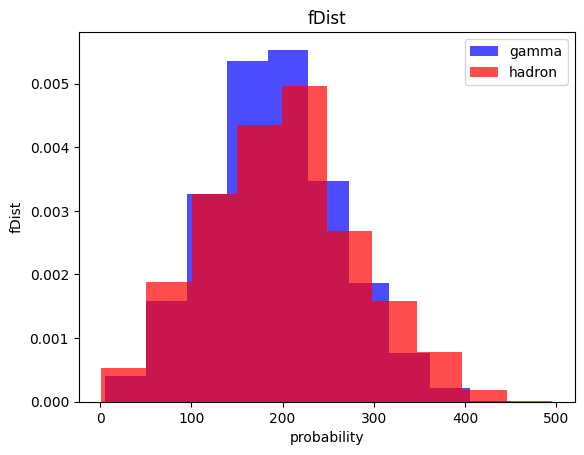

In [25]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel("probability")
  plt.ylabel(label)
  plt.legend()
  plt.show()

# Train, validate, test datasets

In [26]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [27]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)
  data = np.hstack((X, np.reshape(Y, (-1, 1))))

  return data, X, Y

In [28]:
# print(len(train[train["class"]==1])) # gamma
# print(len(train[train["class"]==0])) # hadron
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [29]:
len(Y_train)

14768

In [30]:
sum(Y_train == 1)

7384

In [31]:
sum(Y_train == 0)

7384

# kNN (k Nearest Neightbours)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
Y_pred = knn_model.predict(X_test)

In [39]:
Y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [40]:
Y_test

array([1, 1, 1, ..., 1, 1, 0])

In [42]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1321
           1       0.84      0.89      0.86      2483

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804

